<a href="https://colab.research.google.com/github/IsaevRustam/diploma/blob/main/diploma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

np.random.seed(42)  # чтобы генерация была повторяемой

heights = np.random.normal(170, 10, 20)  # рост в см
weights = np.random.normal(70, 5, 20)   # вес в кг

# объединяем рост и вес в матрицу "признаков" X
X = np.column_stack((heights, weights))

# и генерируем соответствующие значения "целевой переменной" y
k_true = 0.6
b_true = -20
y = k_true*X[:,0] + b_true + np.random.normal(0, 5, 20)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)

print("Коэффициенты модели:", model.coef_, model.intercept_)


Коэффициенты модели: [0.45128822 0.04519848] 1.7890238467139312


In [ ]:
max_delta_k = max_delta_b = 0

for i in range(20):
    # удаляем i-го человека из выборки
    X_i = np.delete(X, i, axis=0)
    y_i = np.delete(y, i)
    
    # обучаем модель на новых данных
    model_i = LinearRegression().fit(X_i, y_i)
    
    # сравниваем коэффициенты модели с истинными значениями
    delta_k = abs(model_i.coef_[0] - k_true)
    delta_b = abs(model_i.intercept_ - b_true)

    # обновляем максимальную разницу, если она больше текущей
    max_delta_k = max(max_delta_k, delta_k)
    max_delta_b = max(max_delta_b, delta_b)



In [ ]:
import numpy as np

# Задаем "истинные" коэффициенты для функции линейной регрессии y = kx + b
true_k = 0.5
true_b = 10

n = 5

# Генерируем выборку из 20 человек
#np.random.seed(42)
#heights = np.random.normal(170, 10, 20)  # рост в см
#weights = true_k * heights + true_b + np.random.normal(0, 5, 20)  # вес в кг

#np.random.seed(42)  # чтобы генерация была повторяемой

heights = np.random.normal(170, 10, n)  # рост в см
weights = np.random.normal(65, 5, n)   # вес в кг

# Соединяем данные в матрицу признаков
X = heights.reshape(-1, 1)
y = weights.reshape(-1, 1)
data = np.hstack([X, y])


In [ ]:
X

array([[172.27459935],
       [183.07142754],
       [153.92516765],
       [171.84633859],
       [172.59882794]])

In [ ]:
data

array([[172.27459935,  68.90911436],
       [183.07142754,  58.81524645],
       [153.92516765,  58.39771693],
       [171.84633859,  67.60970783],
       [172.59882794,  66.48492337]])

In [ ]:
from sklearn.model_selection import train_test_split

# Разбиваем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Обучаем модель линейной регрессии на тренировочной выборке
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# Оцениваем качество модели на тестовой выборке
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")


MSE: 204.62


In [ ]:
deltas = []
for i in range(data.shape[0] - 1):
    # Удаляем i-го человека из выборки
    print("before:\n", X_train)
    print("before:\n", y_train)
    X_i = np.delete(X_train, i, axis=0)
    y_i = np.delete(y_train, i, axis=0)
    print("after:\n", X_i)
    print("after:\n", y_i)
    # Переобучаем модель на оставшейся выборке
    model_i = LinearRegression()
    model_i.fit(X_i, y_i)

    #print(X_i)
    
    # Вычисляем коэффициенты регрессии и сравниваем с "истинными"
    k_i, b_i = model_i.coef_[0][0], model_i.intercept_[0]
    delta_k = abs(k_i - true_k)
    delta_b = abs(b_i - true_b)
    deltas.append((delta_k, delta_b))
    
    # Добавляем удаленного человека обратно в выборку
    #X_train = np.insert(X_train, i, X_train[i], axis=0)
    #y_train = np.insert(y_train, i, y_train[i], axis=0)


before:
 [[172.59882794]
 [153.92516765]
 [172.27459935]
 [171.84633859]]
before:
 [[66.48492337]
 [58.39771693]
 [68.90911436]
 [67.60970783]]
after:
 [[153.92516765]
 [172.27459935]
 [171.84633859]]
after:
 [[58.39771693]
 [68.90911436]
 [67.60970783]]
before:
 [[172.59882794]
 [153.92516765]
 [172.27459935]
 [171.84633859]]
before:
 [[66.48492337]
 [58.39771693]
 [68.90911436]
 [67.60970783]]
after:
 [[172.59882794]
 [172.27459935]
 [171.84633859]]
after:
 [[66.48492337]
 [68.90911436]
 [67.60970783]]
before:
 [[172.59882794]
 [153.92516765]
 [172.27459935]
 [171.84633859]]
before:
 [[66.48492337]
 [58.39771693]
 [68.90911436]
 [67.60970783]]
after:
 [[172.59882794]
 [153.92516765]
 [171.84633859]]
after:
 [[66.48492337]
 [58.39771693]
 [67.60970783]]
before:
 [[172.59882794]
 [153.92516765]
 [172.27459935]
 [171.84633859]]
before:
 [[66.48492337]
 [58.39771693]
 [68.90911436]
 [67.60970783]]
after:
 [[172.59882794]
 [153.92516765]
 [172.27459935]]
after:
 [[66.48492337]
 [58.397716

In [ ]:
deltas = []
for i in range(data.shape[0]):
    # Удаляем i-го человека из выборки
    X_i = np.delete(X_train, i, axis=0)
    y_i = np.delete(y_train, i, axis=0)
    
    # Переобучаем модель на оставшейся выборке
    model_i = LinearRegression()
    model_i.fit(X_i, y_i)
    
    # Вычисляем коэффициенты регрессии и сравниваем с "истинными"
    k_i, b_i = model_i.coef_[0][0], model_i.intercept_[0]
    delta_k = abs(k_i - true_k)
    delta_b = abs(b_i - true_b)
    deltas.append((delta_k, delta_b))
    
    # Добавляем удаленного человека обратно в выборку
    X_train = np.insert(X_train, i, X_i[i], axis=0)
    y_train = np.insert(y_train, i, y_i[i], axis=0)


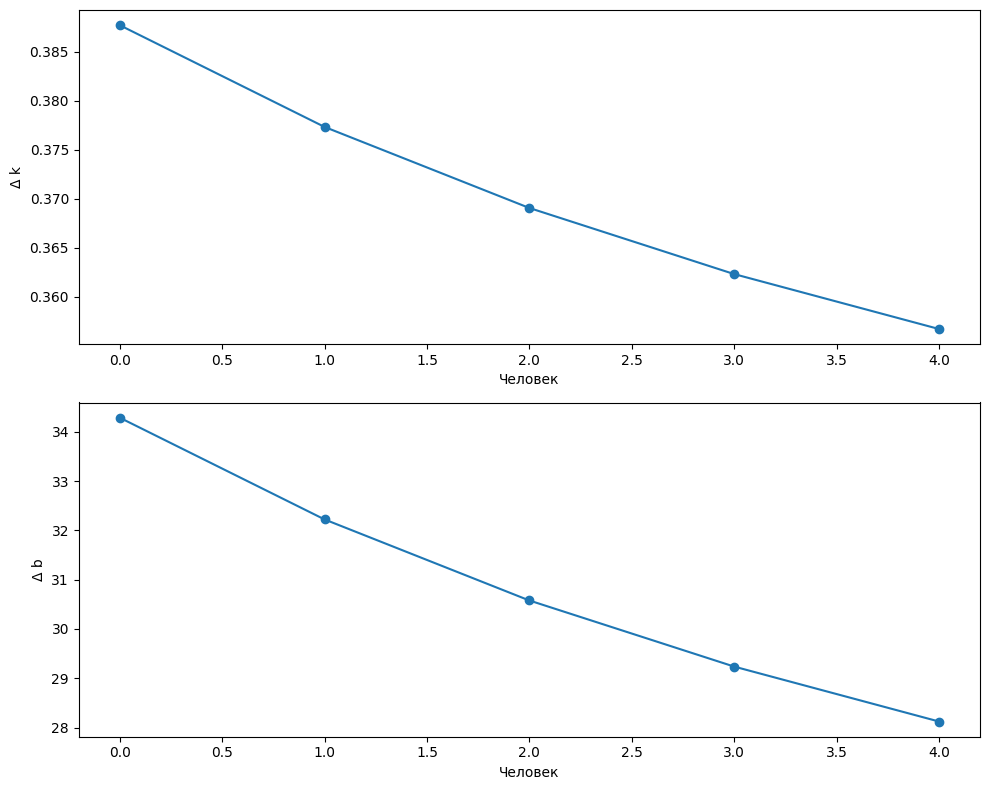

In [ ]:
import matplotlib.pyplot as plt

# Изображаем различия между коэффициентами регрессии и "истинными"
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
axs[0].plot(range(n), [delta[0] for delta in deltas], marker='o')
axs[0].set_xlabel('Человек')
axs[0].set_ylabel('Δ k')
axs[1].plot(range(n), [delta[1] for delta in deltas], marker='o')
axs[1].set_xlabel('Человек')
axs[1].set_ylabel('Δ b')
plt.tight_layout()


Максимальное отличие коэффициентов при удалении:
K: 0.06839315537103735
B: 11.853444276899012


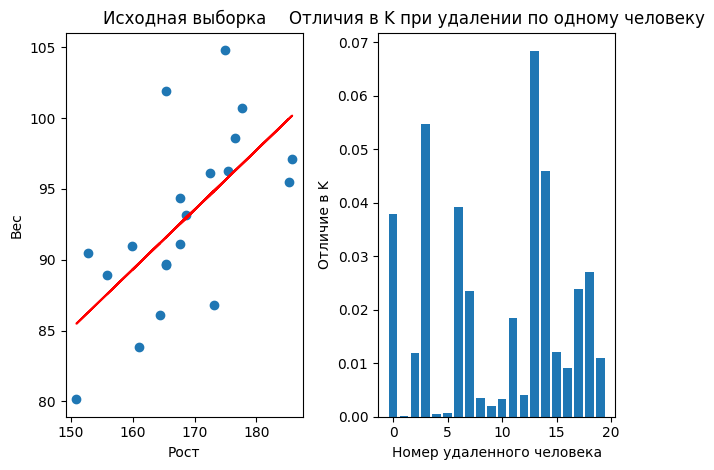

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Задаем коэффициенты исходной функции линейной регрессии
k_true = 0.5
b_true = 10

# Генерируем выборку из 20 человек
np.random.seed(42)  # для воспроизводимости результатов
heights = np.random.normal(loc=170, scale=10, size=20)
weights = k_true * heights + b_true + np.random.normal(loc=0, scale=5, size=20)

# Строим модель линейной регрессии и находим "истинные" коэффициенты
X = heights.reshape(-1, 1)
y = weights
model = LinearRegression()
model.fit(X, y)
k_hat_true = model.coef_[0]
b_hat_true = model.intercept_

# Удаляем по одному человеку и находим максимальное отличие коэффициентов
k_deltas = []
b_deltas = []
for i in range(20):
    X_subset = np.delete(X, i, axis=0)
    y_subset = np.delete(y, i)
    model_subset = LinearRegression()
    model_subset.fit(X_subset, y_subset)
    k_hat_subset = model_subset.coef_[0]
    b_hat_subset = model_subset.intercept_
    k_delta = abs(k_hat_true - k_hat_subset)
    b_delta = abs(b_hat_true - b_hat_subset)
    k_deltas.append(k_delta)
    b_deltas.append(b_delta)

# Выводим результаты
print("Максимальное отличие коэффициентов при удалении:")
print(f"K: {max(k_deltas)}")
print(f"B: {max(b_deltas)}")

# Рисуем графики
plt.subplot(121)
plt.plot(X, y, 'o')
plt.plot(X, model.predict(X), 'r')
plt.title("Исходная выборка")
plt.xlabel("Рост")
plt.ylabel("Вес")
plt.subplot(122)
plt.bar(range(20), k_deltas)
plt.title("Отличия в K при удалении по одному человеку")
plt.xlabel("Номер удаленного человека")
plt.ylabel("Отличие в K")
plt.tight_layout()
plt.show()


Максимальное отличие коэффициентов при удалении:
K: 0.11186622669271834
B: 18.31039987771115


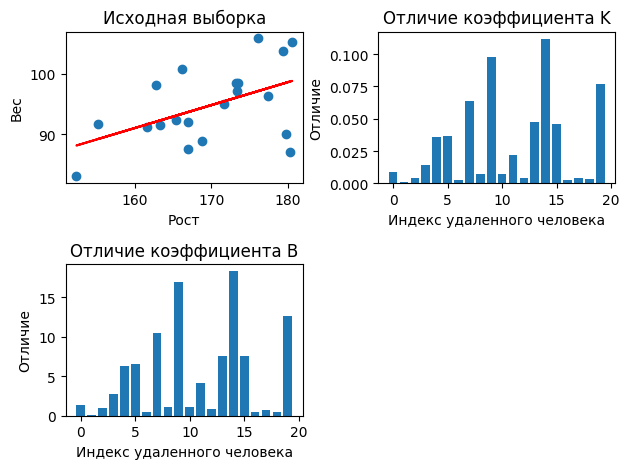

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Задаем коэффициенты исходной функции линейной регрессии
k_true = 0.5
b_true = 10

# Генерируем выборку из 20 человек
#np.random.seed(42)  # для воспроизводимости результатов
heights = np.random.normal(loc=170, scale=10, size=20)
weights = k_true * heights + b_true + np.random.normal(loc=0, scale=5, size=20)

# Строим модель линейной регрессии и находим "истинные" коэффициенты
X = heights.reshape(-1, 1)
y = weights
model = LinearRegression()
model.fit(X, y)
k_hat_true = model.coef_[0]
b_hat_true = model.intercept_

# Удаляем по одному человеку и находим максимальное отличие коэффициентов
k_deltas = []
b_deltas = []
for i in range(20):
    X_subset = np.delete(X, i, axis=0)
    y_subset = np.delete(y, i)
    model_subset = LinearRegression()
    model_subset.fit(X_subset, y_subset)
    k_hat_subset = model_subset.coef_[0]
    b_hat_subset = model_subset.intercept_
    k_delta = abs(k_hat_true - k_hat_subset)
    b_delta = abs(b_hat_true - b_hat_subset)
    k_deltas.append(k_delta)
    b_deltas.append(b_delta)

# Выводим результаты
print("Максимальное отличие коэффициентов при удалении:")
print(f"K: {max(k_deltas)}")
print(f"B: {max(b_deltas)}")

# Рисуем графики
plt.subplot(221)
plt.plot(X, y, 'o')
plt.plot(X, model.predict(X), 'r')
plt.title("Исходная выборка")
plt.xlabel("Рост")
plt.ylabel("Вес")

plt.subplot(222)
plt.bar(range(20), k_deltas)
plt.title("Отличие коэффициента K")
plt.xlabel("Индекс удаленного человека")
plt.ylabel("Отличие")

plt.subplot(223)
plt.bar(range(20), b_deltas)
plt.title("Отличие коэффициента B")
plt.xlabel("Индекс удаленного человека")
plt.ylabel("Отличие")

plt.tight_layout()
plt.show()

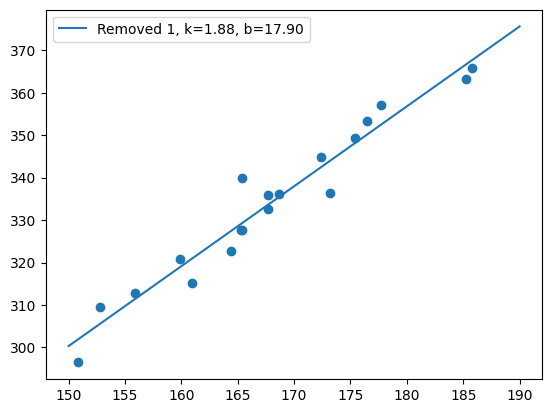

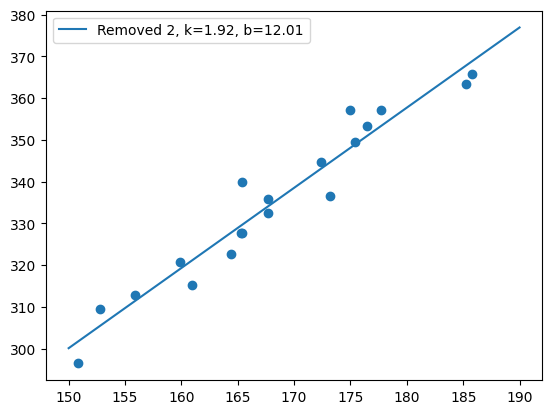

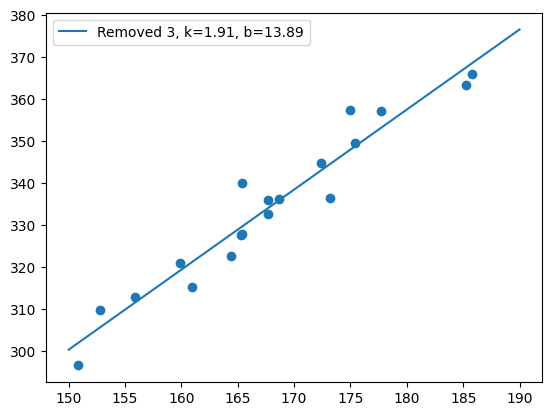

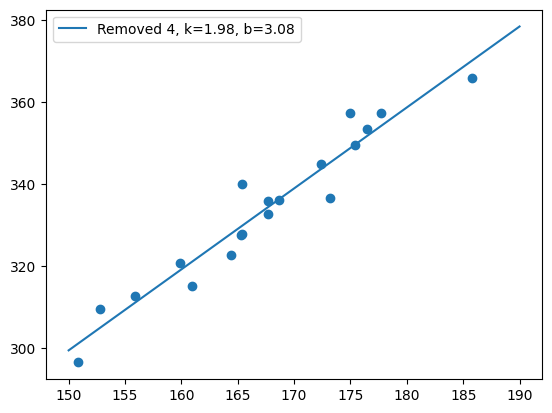

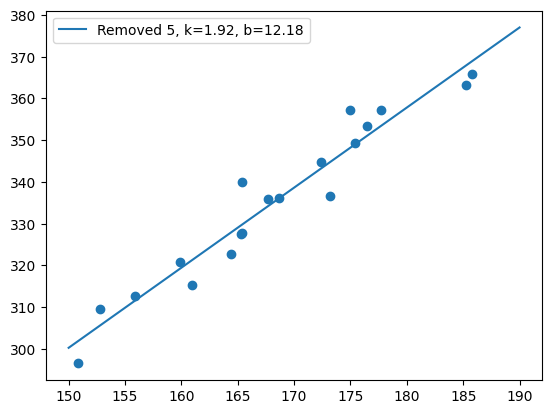

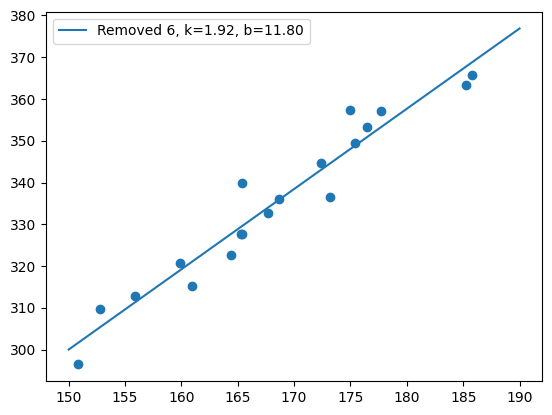

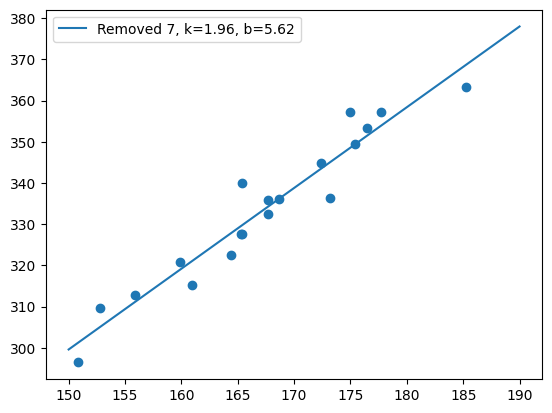

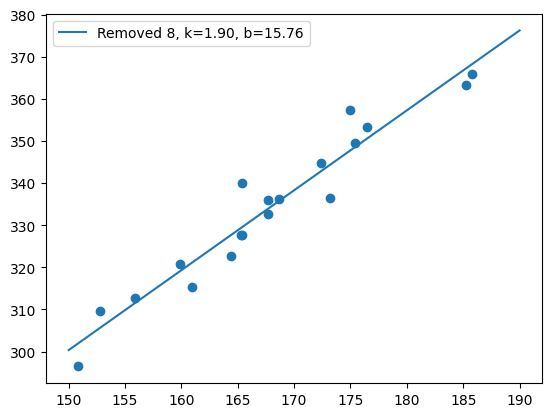

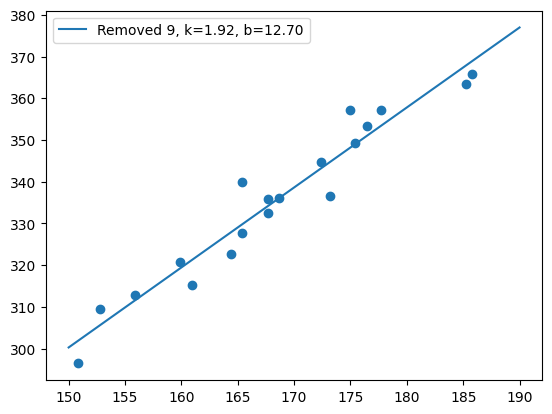

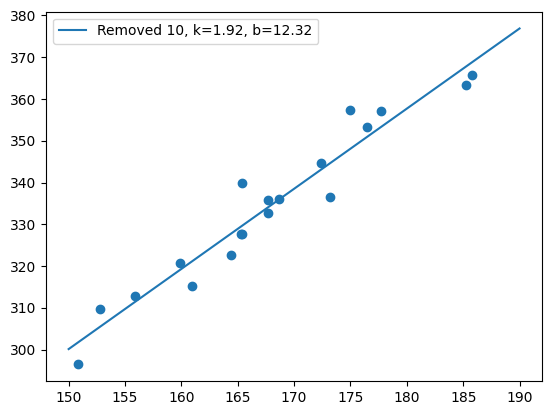

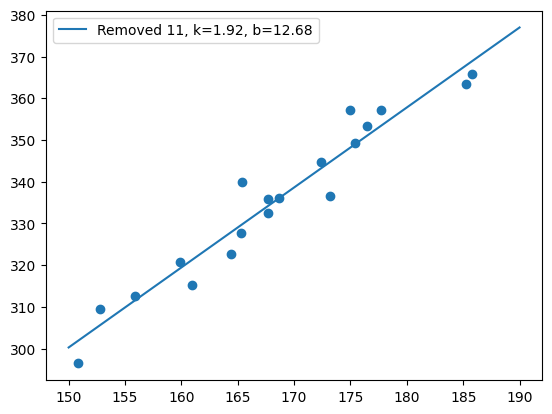

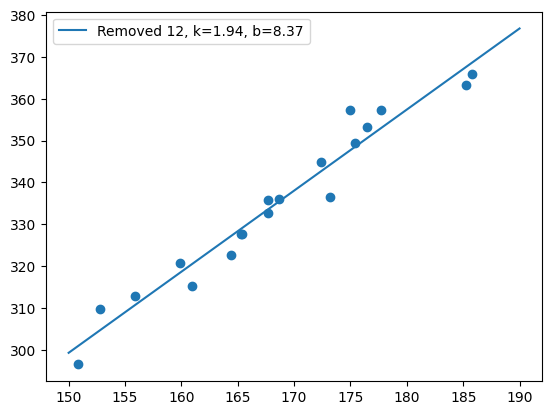

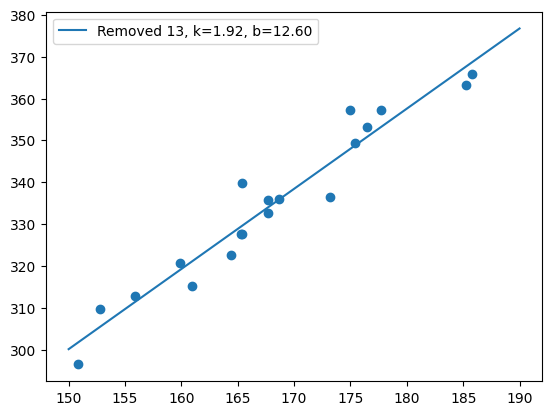

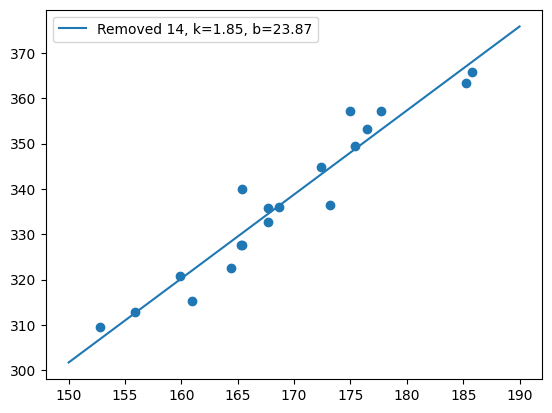

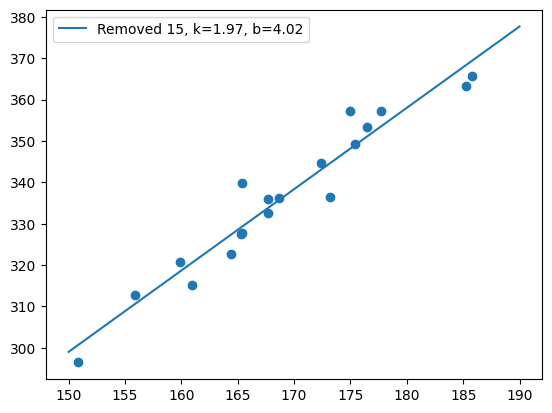

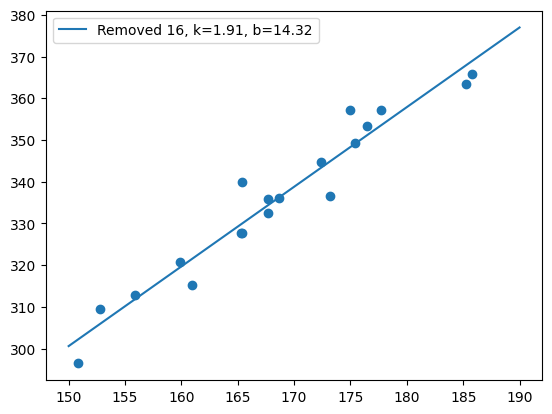

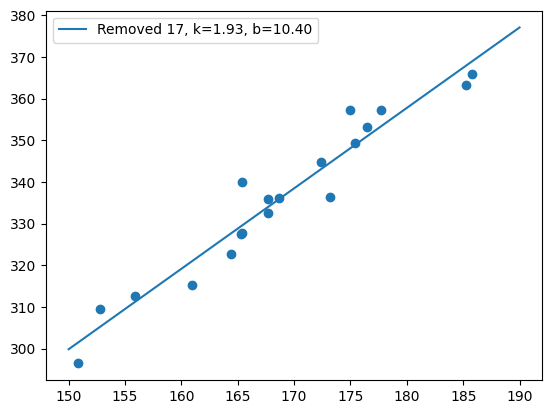

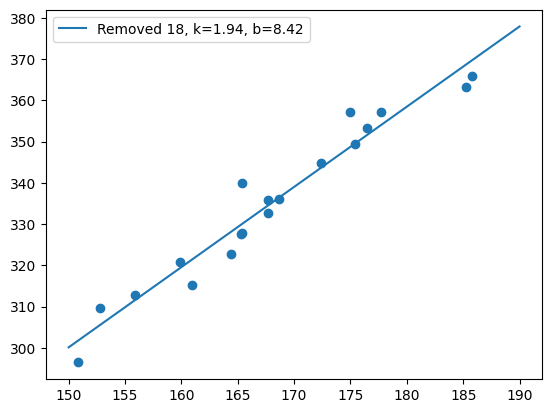

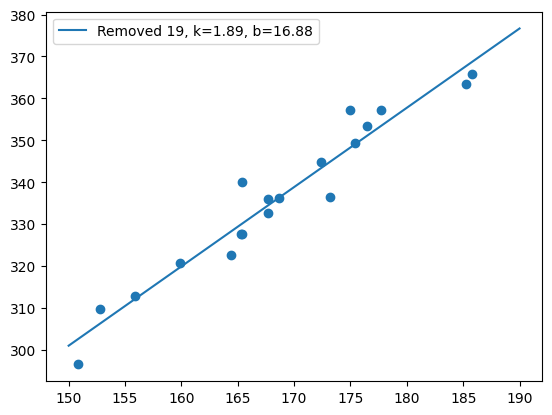

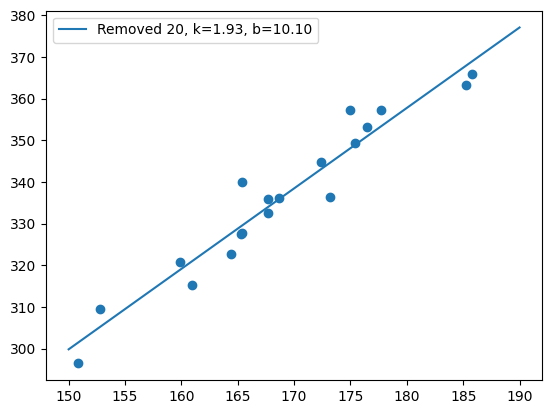

Max delta k: 0.07
Max delta b: 11.85


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Генерируем выборку
np.random.seed(42)
X = np.random.normal(170, 10, 20).reshape(-1, 1)
y = 2*X + np.random.normal(0, 5, 20).reshape(-1, 1)

# Находим истинные коэффициенты для функции линейной регрессии
reg = LinearRegression().fit(X, y)
true_k, true_b = reg.coef_[0][0], reg.intercept_[0]

# Удаляем i-го человека из выборки и находим коэффициенты для функции линейной регрессии
deltas_k, deltas_b = [], []
for i in range(len(X)):
    X_without_i = np.delete(X, i, axis=0)
    y_without_i = np.delete(y, i, axis=0)
    reg = LinearRegression().fit(X_without_i, y_without_i)
    delta_k, delta_b = abs(true_k - reg.coef_[0][0]), abs(true_b - reg.intercept_[0])
    deltas_k.append(delta_k)
    deltas_b.append(delta_b)
    
    # Рисуем график
    x_plot = np.linspace(150, 190, 2)
    y_plot = reg.predict(x_plot.reshape(-1, 1))
    plt.scatter(X_without_i, y_without_i)
    plt.plot(x_plot, y_plot, label=f'Removed {i+1}, k={reg.coef_[0][0]:.2f}, b={reg.intercept_[0]:.2f}')
    plt.legend()
    plt.show()

# Находим максимальные разницы в коэффициентах при удалении одного человека
max_delta_k, max_delta_b = max(deltas_k), max(deltas_b)

# Выводим результаты
print(f'Max delta k: {max_delta_k:.2f}')
print(f'Max delta b: {max_delta_b:.2f}')


True coefficients: k=0.48, b=12.89
Iteration 1: k=0.47, b=16.12


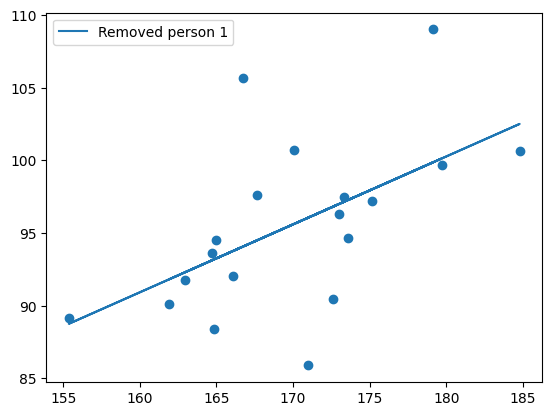

Iteration 2: k=0.49, b=11.28


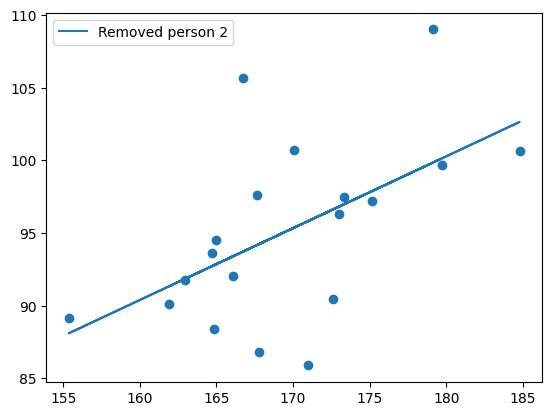

Iteration 3: k=0.52, b=6.20


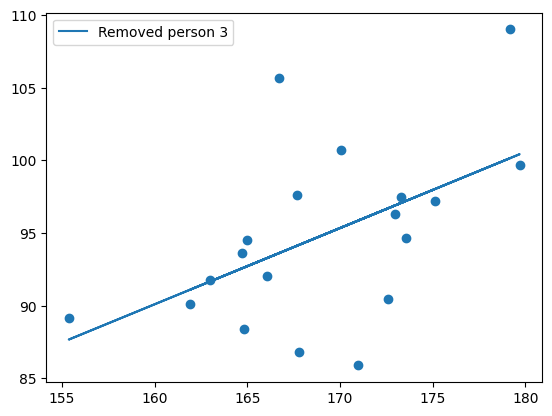

Iteration 4: k=0.46, b=17.45


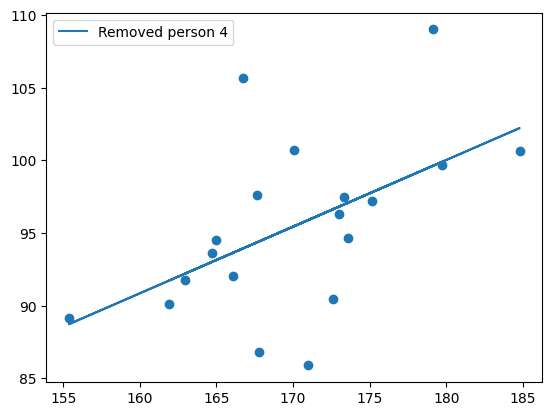

Iteration 5: k=0.47, b=14.87


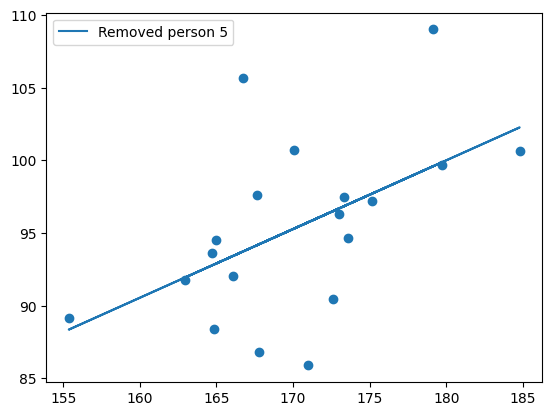

Iteration 6: k=0.49, b=11.13


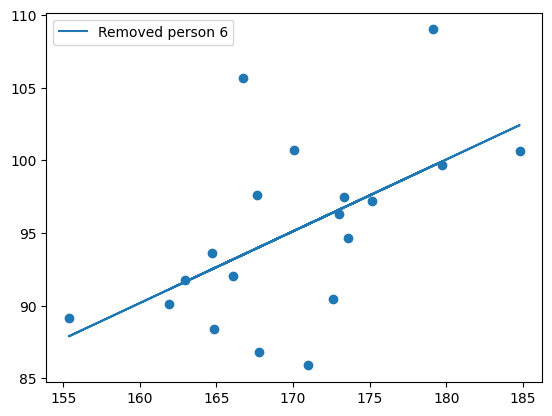

Iteration 7: k=0.37, b=31.64


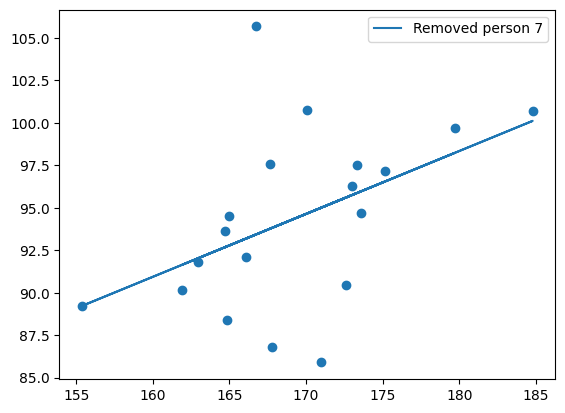

Iteration 8: k=0.48, b=13.35


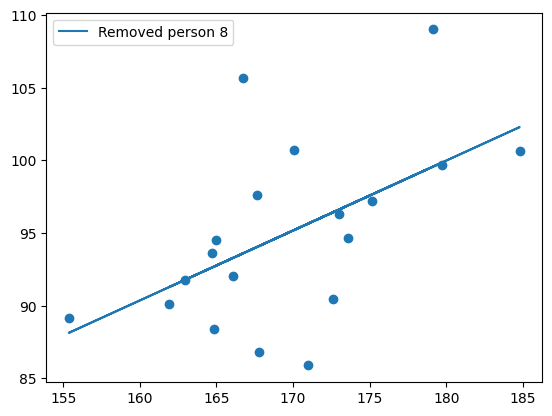

Iteration 9: k=0.49, b=11.82


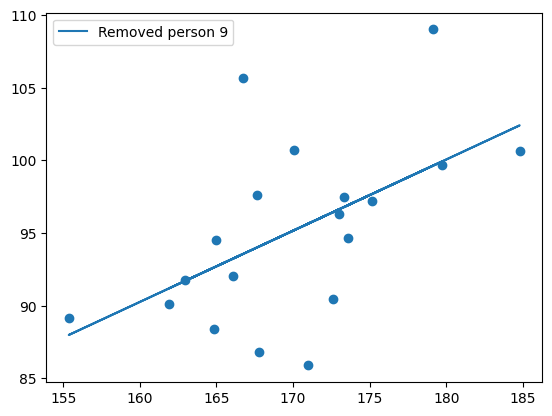

Iteration 10: k=0.49, b=12.36


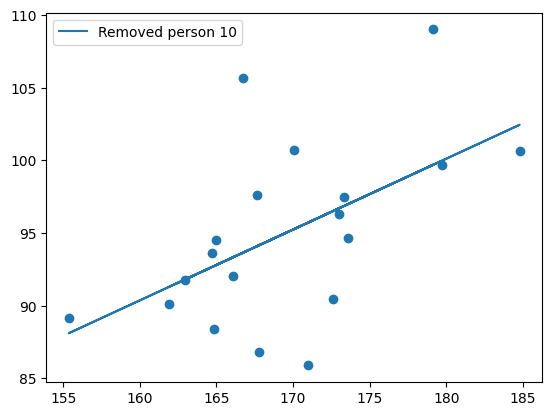

Iteration 11: k=0.50, b=11.07


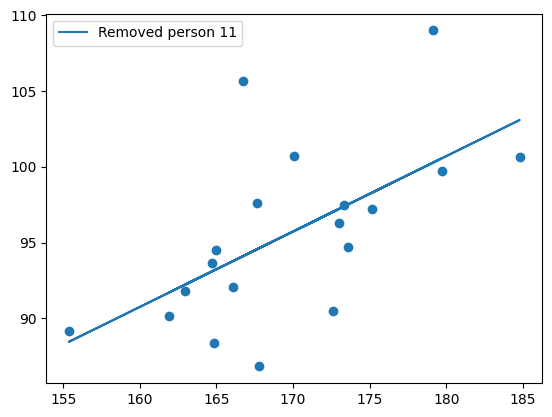

Iteration 12: k=0.49, b=12.46


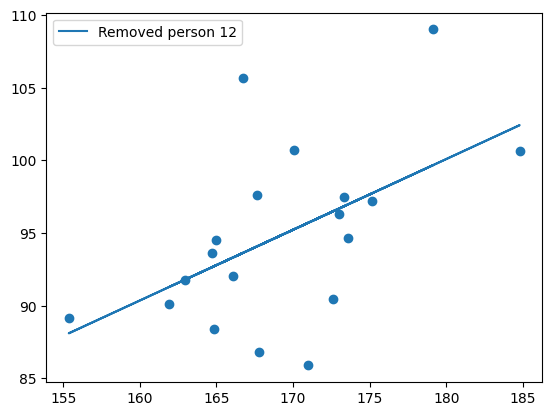

Iteration 13: k=0.48, b=12.93


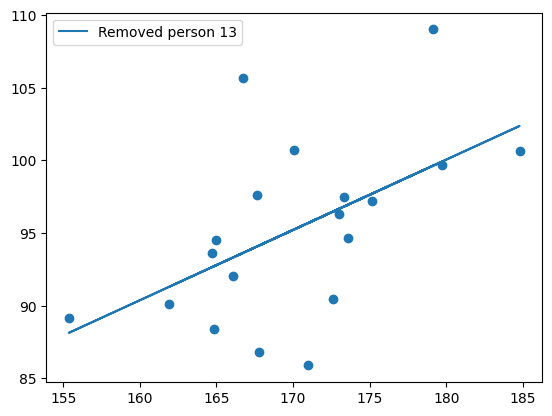

Iteration 14: k=0.53, b=4.96


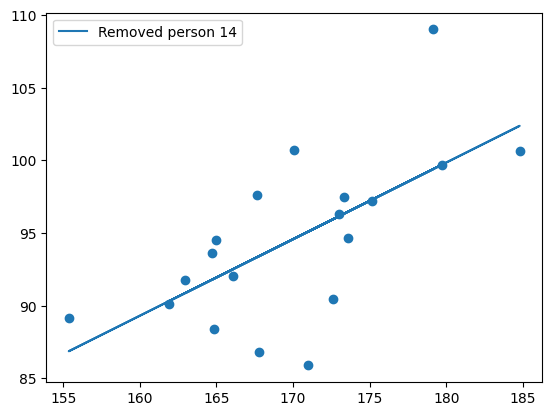

Iteration 15: k=0.48, b=13.87


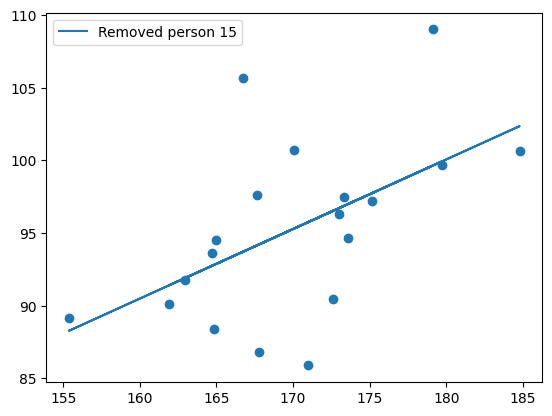

Iteration 16: k=0.51, b=8.85


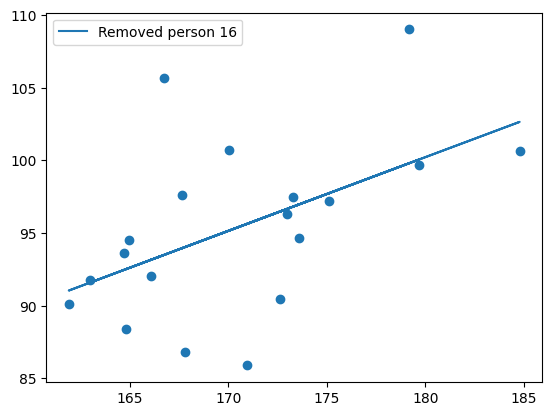

Iteration 17: k=0.49, b=12.69


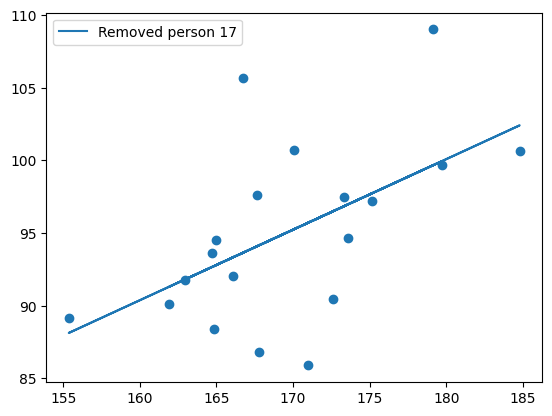

Iteration 18: k=0.50, b=9.80


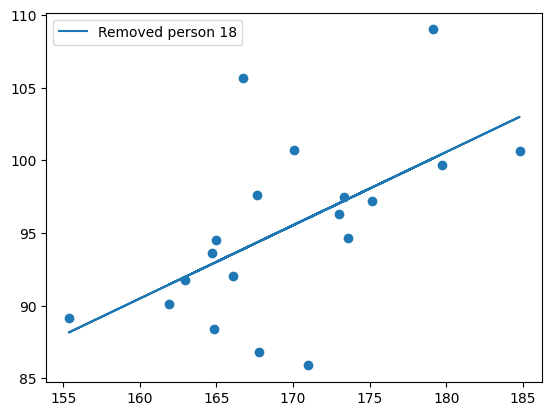

Iteration 19: k=0.48, b=12.91


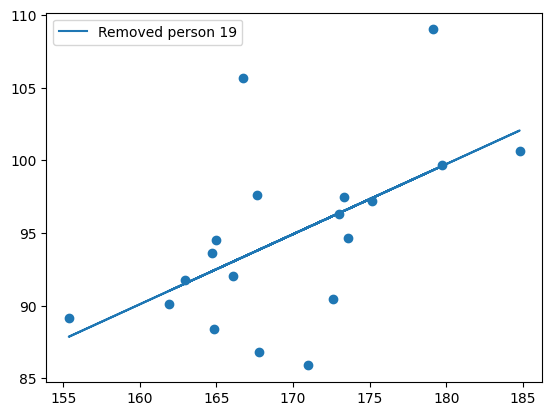

Iteration 20: k=0.49, b=11.24


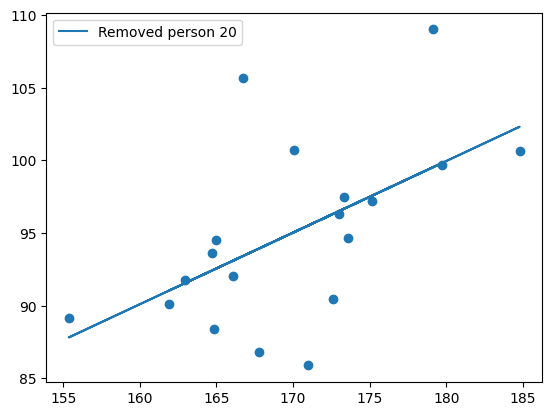

Max delta k: 0.11
Max delta b: 18.75


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Сгенерируем выборку из 20 человек с ростом и весом
#np.random.seed(42)
n_samples = 20
height = np.random.normal(loc=170, scale=10, size=n_samples)
weight = 0.5 * height + 10 + np.random.normal(loc=0, scale=5, size=n_samples)

# Построим линейную регрессию для всей выборки
X = height.reshape(-1, 1)
y = weight
reg = LinearRegression().fit(X, y)
k_true = reg.coef_[0]
b_true = reg.intercept_
print(f"True coefficients: k={k_true:.2f}, b={b_true:.2f}")

# Удаляем каждого человека из выборки и строим регрессию заново
deltas_k = []
deltas_b = []
for i in range(n_samples):
    X = np.delete(height, i).reshape(-1, 1)
    y = np.delete(weight, i)
    reg = LinearRegression().fit(X, y)
    k = reg.coef_[0]
    b = reg.intercept_
    delta_k = np.abs(k - k_true)
    delta_b = np.abs(b - b_true)
    deltas_k.append(delta_k)
    deltas_b.append(delta_b)
    print(f"Iteration {i+1}: k={k:.2f}, b={b:.2f}")
    
    # Рисуем график с исключенным i-м человеком
    plt.scatter(X, y)
    plt.plot(X, reg.predict(X), label=f"Removed person {i+1}")
    plt.legend()
    plt.show()

# Находим и выводим максимальные дельты для k и b
max_delta_k = max(deltas_k)
max_delta_b = max(deltas_b)
print(f"Max delta k: {max_delta_k:.2f}")
print(f"Max delta b: {max_delta_b:.2f}")
